# Basics of logistic regression

## Import the relevantes libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load the data

In [3]:
raw_data = pd.read_csv('2.01. Admittance.csv')
raw_data

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No
...,...,...
163,1722,Yes
164,1750,Yes
165,1555,No
166,1524,No


In [4]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes':1, 'No':0})
data

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
...,...,...
163,1722,1
164,1750,1
165,1555,0
166,1524,0


## Variables

In [5]:
y = data['Admitted']
x1 = data['SAT']

## Let's plot the data

### Scatter plot

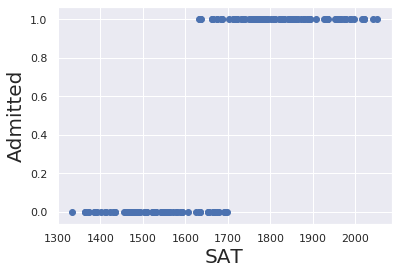

In [9]:
plt.scatter(x1, y, color='C0')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('Admitted', fontsize=20)
plt.show()

## Regression

In [11]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


## Summary

In [13]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Fri, 02 Oct 2020   Pseudo R-squ.:                  0.7992
Time:                        11:33:06   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## Accuracy

In [16]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
results_log.predict()

array([0.00, 1.00, 1.00, 0.38, 0.05, 0.98, 0.99, 1.00, 1.00, 0.03, 1.00,
       1.00, 0.50, 0.00, 0.77, 1.00, 0.21, 0.22, 0.23, 1.00, 1.00, 1.00,
       0.00, 0.00, 0.91, 1.00, 0.22, 1.00, 1.00, 0.98, 0.00, 0.61, 0.41,
       1.00, 1.00, 1.00, 0.50, 1.00, 0.39, 0.00, 0.04, 0.20, 1.00, 0.00,
       1.00, 0.00, 0.98, 0.00, 0.00, 0.01, 0.01, 1.00, 0.80, 0.01, 1.00,
       0.00, 0.56, 0.95, 0.22, 0.99, 0.01, 0.89, 1.00, 1.00, 0.99, 0.00,
       0.00, 0.00, 1.00, 0.00, 0.89, 0.22, 0.00, 1.00, 1.00, 1.00, 0.00,
       0.49, 1.00, 1.00, 0.01, 1.00, 1.00, 0.65, 1.00, 1.00, 0.00, 1.00,
       0.99, 0.72, 0.60, 0.00, 0.95, 0.91, 0.00, 1.00, 1.00, 0.01, 0.98,
       0.88, 0.99, 0.00, 0.99, 0.03, 0.00, 0.99, 0.99, 1.00, 0.00, 0.00,
       0.04, 0.52, 0.00, 1.00, 0.16, 0.00, 0.92, 0.00, 0.47, 1.00, 1.00,
       0.02, 0.00, 0.00, 1.00, 0.01, 0.96, 0.75, 0.72, 0.94, 0.60, 0.00,
       1.00, 0.00, 0.00, 0.00, 1.00, 0.08, 0.00, 0.01, 1.00, 0.98, 0.70,
       0.99, 1.00, 0.02, 0.00, 0.00, 0.00, 0.83, 1.

In [18]:
np.array(data['Admitted'])

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0])

In [19]:
results_log.pred_table()

array([[67.00, 7.00],
       [7.00, 87.00]])